# Exploratory Data Analysis Project: 

# Meteorites 

## Why meteorites?
-> As a bit of an origin story for this particular data set, I originally looked into auroras (the northern lights) as my initial data set. But after running into some FTP server issues, and external file problems, I decided to switch to another topic. 

I still wanted to keep the atmospheric element, as well as focusing on light (generated by natural phenomena) and solar components. After discussing with a couple of friends, one of them recommended a meteorite dataset which I then studied, and found to my surprise (though I should have known) that it fulfilled my requirements for both an atmospheric and light component.  

## Aim:
" To create a narrative, filled with short stories (facts), that provides a glimpse into the fascinating realm of meteorites" 

In [39]:
import pandas as pd

In [40]:
data  = pd.read_csv('Meteorite-Landings.csv')

[Meteorite Data Set (CSV)](https://data.world/nasa/meteorite-landings?fbclid=IwAR29VnWd7r4Dgr7a7bCwrp39VkELq51MjKZqexUcuvsJKb5edDikD3q6Wvg) was sourced from Data.World and was compiled by Nasa.

[Visual Meteor Database (CSV)](https://www.imo.net/members/imo_vmdb) was sourced from the International Meteor Organisation. 

### Cleaning The Data
 - Data pre-processing 
 - Checking abnormality specific to the dataset 
 - Checking for null values
 - Removing null values
 - Resetting index after removing null values, zero mass rows and invalid geolocations

#### Data pre-processing 

In [41]:
data

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.789170, 41.504600)"


In [42]:
data['DateTime'] = pd.to_datetime(data['year'], format = "%m/%d/%Y %H:%M:%S %p", errors = 'coerce')

In [43]:
data['year'] = data['DateTime'].dt.year

In [44]:
data['year'] = data['year'].astype(pd.Int64Dtype())

In [45]:
#Sorting dataset on basis of year in ascending order
data.sort_values(by=['year'],inplace=True)

#### Checking abnormality specific to the dataset

In [46]:
#This dataset has data till 2016
data[data['year']>2016]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,DateTime
30679,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101,0.0,0.0,"(0.000000, 0.000000)",2101-01-01 12:00:00


In [47]:
#Dataset has rows which are >2016 but it is in BCE (Before Common Era), though it is not correct still it is abnormailty in our dataset
data.drop(data[data['year']>2016].index, inplace=True)

In [48]:
#Assuring
data[data['year']>2016]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,DateTime


#### Checking for null values

In [49]:
data.isnull()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,DateTime
883,False,False,False,False,False,False,False,False,False,False,False
76,False,False,False,False,True,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
37631,False,False,False,False,False,False,False,False,False,False,False
800,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
38201,False,False,False,False,False,False,True,False,False,False,True
38224,False,False,False,False,False,False,True,False,False,False,True
38301,False,False,False,False,False,False,True,False,False,False,True
38328,False,False,False,False,False,False,True,False,False,False,True


In [50]:
data.isnull().any()

name           False
id             False
nametype       False
recclass       False
mass (g)        True
fall           False
year            True
reclat          True
reclong         True
GeoLocation     True
DateTime        True
dtype: bool

##### How many null values in each column 

In [51]:
#Count of null values
data.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            312
reclat         7315
reclong        7315
GeoLocation    7315
DateTime        312
dtype: int64

##### Removing null values from the dataset

In [52]:
#Dropping null values from the Dataset
data.dropna(inplace=True)

In [53]:
#Count of null values after dropping null values
data.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
DateTime       0
dtype: int64

In [54]:
#Dataset count row-wise for each column after removing null values
data.count()

name           38100
id             38100
nametype       38100
recclass       38100
mass (g)       38100
fall           38100
year           38100
reclat         38100
reclong        38100
GeoLocation    38100
DateTime       38100
dtype: int64

##### Dropping rows where mass is zero


In [55]:
#Counting rows where mass is zero before dropping
data[data['mass (g)']==0].count()

name           19
id             19
nametype       19
recclass       19
mass (g)       19
fall           19
year           19
reclat         19
reclong        19
GeoLocation    19
DateTime       19
dtype: int64

In [56]:
#Dropping rows where mass is zero
data.drop(data[data['mass (g)']==0].index, inplace=True)

In [57]:
#Counting rows where mass is zero after dropping
data[data['mass (g)']==0].count()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
DateTime       0
dtype: int64

#### Reset Index after removing null values, zero mass rows, invalid geolocations

In [58]:
#Reset index of Dataset
data.reset_index(inplace=True, drop = True)

In [59]:
data

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,DateTime
0,Sasagase,23187,Valid,H,695.0,Fell,1688,34.71667,137.78333,"(34.716670, 137.783330)",1688-01-01 12:00:00
1,Schellin,23457,Valid,L,7000.0,Fell,1715,53.35000,15.05000,"(53.350000, 15.050000)",1715-01-01 12:00:00
2,Siratik,23615,Valid,"Iron, IIAB",1700.0,Found,1716,14.00000,-11.00000,"(14.000000, -11.000000)",1716-01-01 12:00:00
3,Ploschkovitz,18849,Valid,L5,39.0,Fell,1723,50.53333,14.11667,"(50.533330, 14.116670)",1723-01-01 12:00:00
4,Steinbach,23722,Valid,"Iron, IVA-an",98000.0,Found,1724,50.50000,12.50000,"(50.500000, 12.500000)",1724-01-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...
38076,Northwest Africa 7857,57422,Valid,LL6,246.0,Found,2013,0.00000,0.00000,"(0.000000, 0.000000)",2013-01-01 12:00:00
38077,Northwest Africa 7856,57421,Valid,LL6,517.0,Found,2013,0.00000,0.00000,"(0.000000, 0.000000)",2013-01-01 12:00:00
38078,Northwest Africa 7855,57420,Valid,H4,916.0,Found,2013,0.00000,0.00000,"(0.000000, 0.000000)",2013-01-01 12:00:00
38079,Northwest Africa 7812,57258,Valid,Angrite,46.2,Found,2013,0.00000,0.00000,"(0.000000, 0.000000)",2013-01-01 12:00:00


A bit of definition before we jump into the analysis and visualisation...

Meteorites, Meteors, Asteroids, Meteoroids, Fireballs, and Comets are often used interchangeably without an understanding of the actual definition. Contrary to popular belief, all of these terms have a seperate distinct meaning. 

#### Meteorite
- A fragment of a meteroid or asteroid that survives the atmosphere and comes in contact with the ground

#### Meteor
- The light emitted from a meteoroid as it enters the atmosphere

#### Asteroid
- A large rocky body in space larger than 10meters

#### Meteoroid 
- A small rocky body in space in size from microns to 10meters

#### Bolide
- A large meteor that explodes in the atmosphere

#### Comet
- A small body made from ice and dust that leaves a tail of gas as it travels near the sun

Definition of Meteorites (focus of data set):
- Meteorites are defined as "A solid piece of debris from an object that originates in outer space and survives it's passage through the atmosphere to reach the surface of the planet or moon."

# Analysis and Visualisation 

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#### Fell vs Found Count 

- Fell meteors are ones observed AS they were falling.

- Found meteors are ones located on the ground AFTER impact.

In [61]:
#Count based on Fell and Found
data['fall'].value_counts()

Found    37028
Fell      1053
Name: fall, dtype: int64

In [62]:
#Plotting Histogram on the Categorical data of Column 'fall'
def fall_histogram_2_chart(): 

    sns.histplot(data=data['fall'],color='b',alpha=0.5).set_title('Count of Meteorite Fell vs Found')
    plt.show()

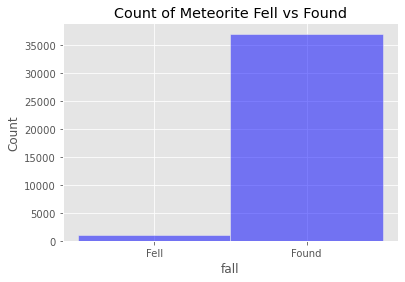

In [63]:
fall_histogram_2_chart()

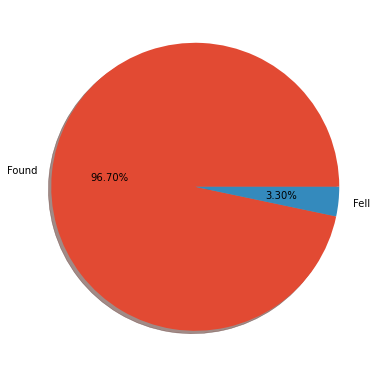

In [103]:
#Plotting Piechart on the data of Column 'fall'
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
ax.pie(data['fall'].value_counts(),labels=['Found', 'Fell'],autopct='%0.2f%%',shadow=True)
plt.show()


#### - Fell vs Fallen meteorites (filtered by mass and year)

In [65]:
fell = data.loc[data['fall'] =='Fell',:]
found = data.loc[data['fall'] =='Found',:]

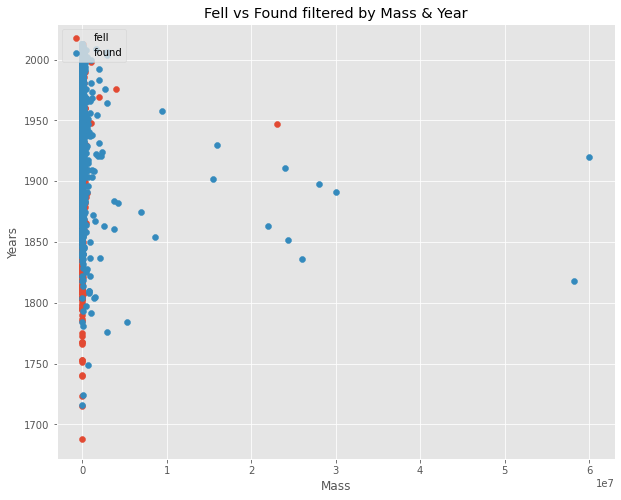

In [66]:
plt.figure(figsize=(10,8))
plt.scatter(fell['mass (g)'],fell.year,  label = 'fell')
plt.scatter(found['mass (g)'], found.year,  label = 'found')
plt.legend(loc=2)
plt.title('Fell vs Found filtered by Mass & Year')
plt.ylabel('Years')
plt.xlabel('Mass')
plt.show()


##### Fell vs Found (filtered by Mass & Year) - individual graphs 

In [106]:
def Fell_graph():

    plt.subplots(1)
    plt.scatter(fell['mass (g)'], fell.year, label = 'fell')
    plt.title('Fell filtered by Mass & Year')
    plt.ylabel('Years')
    plt.xlabel('Mass')
    plt.legend()

def Found_graph():

    plt.subplots(1)
    plt.scatter(found['mass (g)'],found.year, label = 'found', color = 'blue')
    plt.legend()
    plt.title('Found filtered by Mass & Year')
    plt.ylabel('years')
    plt.xlabel('Mass')
    plt.show()

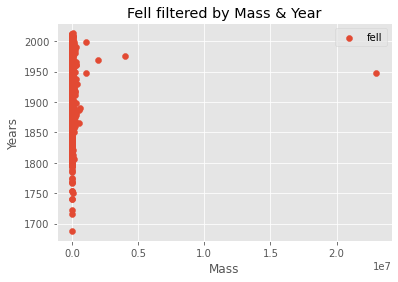

In [107]:
Fell_graph()

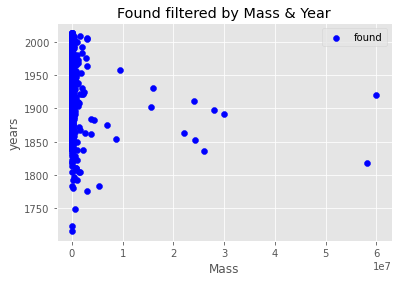

In [108]:
Found_graph()

#### - Which regions (at, above, below equator) has more meteorite impacts?

In [125]:
above_eq = data[data.reclat<0].shape[0]
at_eq = data[data.reclat ==0].shape[0]
below_eq = data[data.reclat>0].shape[0]

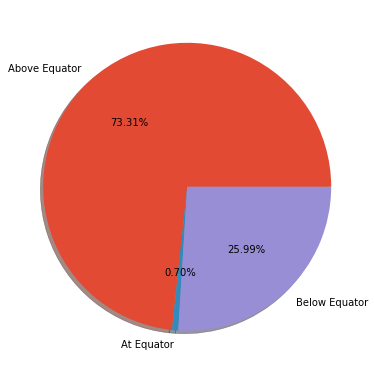

In [126]:
#Plotting Piechart on the data of Column 'fall'
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
ax.pie([above_eq, at_eq, below_eq],labels=['Above Equator', 'At Equator' ,'Below Equator'],autopct='%0.2f%%',shadow=True)
plt.show()

Further research showed these factors can affect landing:
- earth's tilt
- seasons of solar bodies
- hemisphere trailing

#### Average mass of meteors

In [70]:
data['mass (g)'].mean()

14028.18503820801

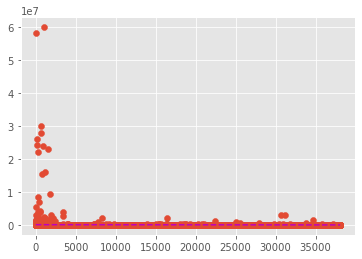

In [71]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(111)
plt.scatter(data.index,data['mass (g)'])

pfit = np.polyfit(data.index, data['mass (g)'], 1)
trend_line_model = np.poly1d(pfit)

plt.plot(data.index, trend_line_model(data.index), "m--") 
plt.show()

In [111]:
def mean_of_meteorite():
    
    data2 = data['mass (g)'].values

    fig, ax = plt.subplots()

    bins = np.linspace(0, 6000, 10)

    ax.hist(data2, bins=bins, color='green', label='Dataset 2',
            alpha=0.5, histtype='stepfilled')

    ax.axvline(data2.mean(), color='green', linewidth=2)

    # Add arrows annotating the means:
    for dat, xoff in zip([data2], [15]):
        x0 = dat.mean()
        align = 'left' if xoff > 0 else 'right'
        ax.annotate('Mean: {:0.2f}'.format(x0), xy=(x0, 1), xytext=(xoff, 15),
                xycoords=('data', 'axes fraction'), textcoords='offset points',
                horizontalalignment=align, verticalalignment='center',
                arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                                connectionstyle='angle,angleA=0,angleB=90,rad=10'),
                )

    ax.margins(0.05)
    plt.show()

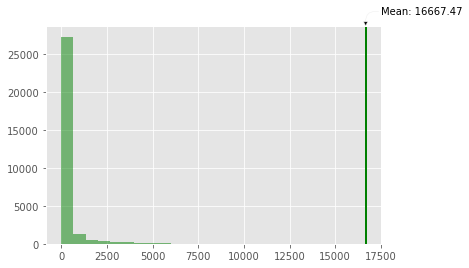

In [113]:
mean_of_meteorite()

- *NOTE: some of the largest meteors (ones that weighed tonnes instead of just kgs), were unavailable due to the having null values or missing metrics as I had cleaned the file beforehand. 
meteors such as Hoba (60 tonnes), Cape York (58.2 tonnes) and Campo del Cielo (50 tonnes) are some examples of the largest meteors in the data set.

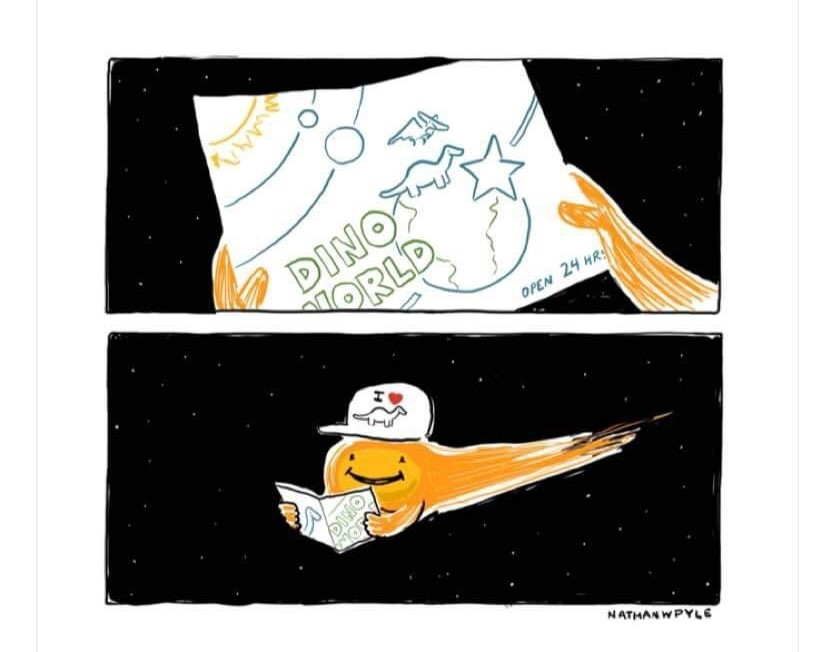

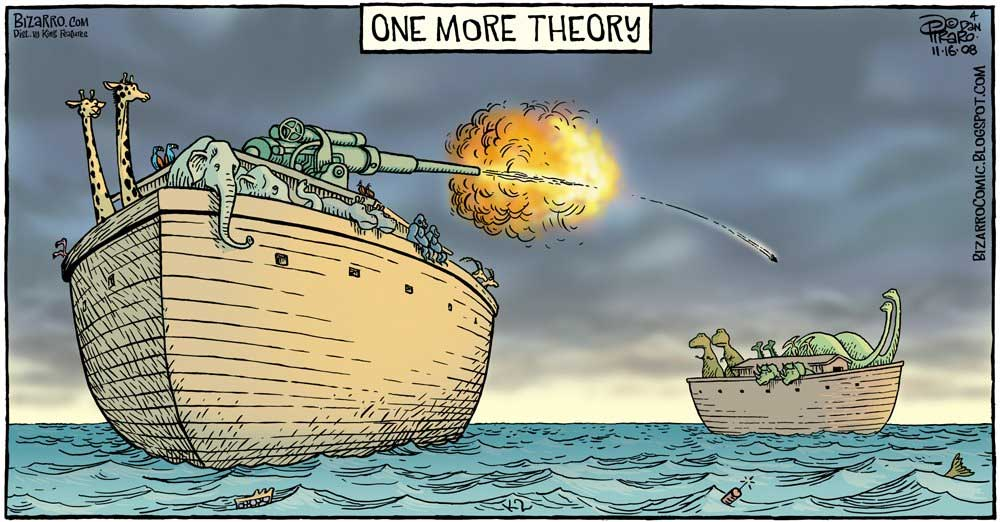

#### Checking for GeoLocation Coordinates

In [73]:
#Checking GeoLocations
print(data[data['GeoLocation']=='(0.000000, 0.000000)'].count())
data[data['GeoLocation']=='(0.000000, 0.000000)']

name           6184
id             6184
nametype       6184
recclass       6184
mass (g)       6184
fall           6184
year           6184
reclat         6184
reclong        6184
GeoLocation    6184
DateTime       6184
dtype: int64


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,DateTime
1998,New York,55760,Valid,"Iron, IIIAB",2950.00,Found,1965,0.0,0.0,"(0.000000, 0.000000)",1965-01-01 12:00:00
20966,Yamato 983980,40600,Valid,H4,77.31,Found,1998,0.0,0.0,"(0.000000, 0.000000)",1998-01-01 12:00:00
20967,Yamato 984019,40639,Valid,H4,4.69,Found,1998,0.0,0.0,"(0.000000, 0.000000)",1998-01-01 12:00:00
20968,Yamato 984021,40641,Valid,H4,49.16,Found,1998,0.0,0.0,"(0.000000, 0.000000)",1998-01-01 12:00:00
20971,Yamato 983985,40605,Valid,H4,8.02,Found,1998,0.0,0.0,"(0.000000, 0.000000)",1998-01-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...
38076,Northwest Africa 7857,57422,Valid,LL6,246.00,Found,2013,0.0,0.0,"(0.000000, 0.000000)",2013-01-01 12:00:00
38077,Northwest Africa 7856,57421,Valid,LL6,517.00,Found,2013,0.0,0.0,"(0.000000, 0.000000)",2013-01-01 12:00:00
38078,Northwest Africa 7855,57420,Valid,H4,916.00,Found,2013,0.0,0.0,"(0.000000, 0.000000)",2013-01-01 12:00:00
38079,Northwest Africa 7812,57258,Valid,Angrite,46.20,Found,2013,0.0,0.0,"(0.000000, 0.000000)",2013-01-01 12:00:00


In [74]:
#Dropping abnormal GeoLocations
data.drop(data[data['GeoLocation']=='(0.000000, 0.000000)'].index, inplace=True)

In [75]:
#Assuring
print(data[data['GeoLocation']=='(0.000000, 0.000000)'].count())
data[data['GeoLocation']=='(0.000000, 0.000000)']

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
DateTime       0
dtype: int64


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,DateTime


#### Meteorites mapped via geolocation (worldwide)

In [76]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')

In [77]:
#Meteorite Count for each GeoLocation 
data['GeoLocation'].value_counts().reset_index()

,index,GeoLocation
0,"(-71.500000, 35.666670)",4760
1,"(-84.000000, 168.000000)",3040
2,"(-72.000000, 26.000000)",1505
3,"(-79.683330, 159.750000)",657
4,"(-76.716670, 159.666670)",637
...,...,...
16886,"(40.810560, 140.785560)",1
16887,"(35.266670, -107.966670)",1
16888,"(-76.697780, 159.346110)",1
16889,"(-30.772830, 127.946670)",1


In [116]:
# Make the background map
def GDM():

    plt.figure(figsize=(24,18))
    m=Basemap(llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
    m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
    m.fillcontinents(color='grey', alpha=0.3)
    m.drawcoastlines(linewidth=0.1, color="white")

    m.plot(data['reclong'], data['reclat'], linestyle='none', marker='o', ms=1)
    #plt.legend(loc=6, prop={'size': 30}, markerscale=8)
    plt.title('Geographic Distribution of Meteorites', fontsize=25)
    plt.show()

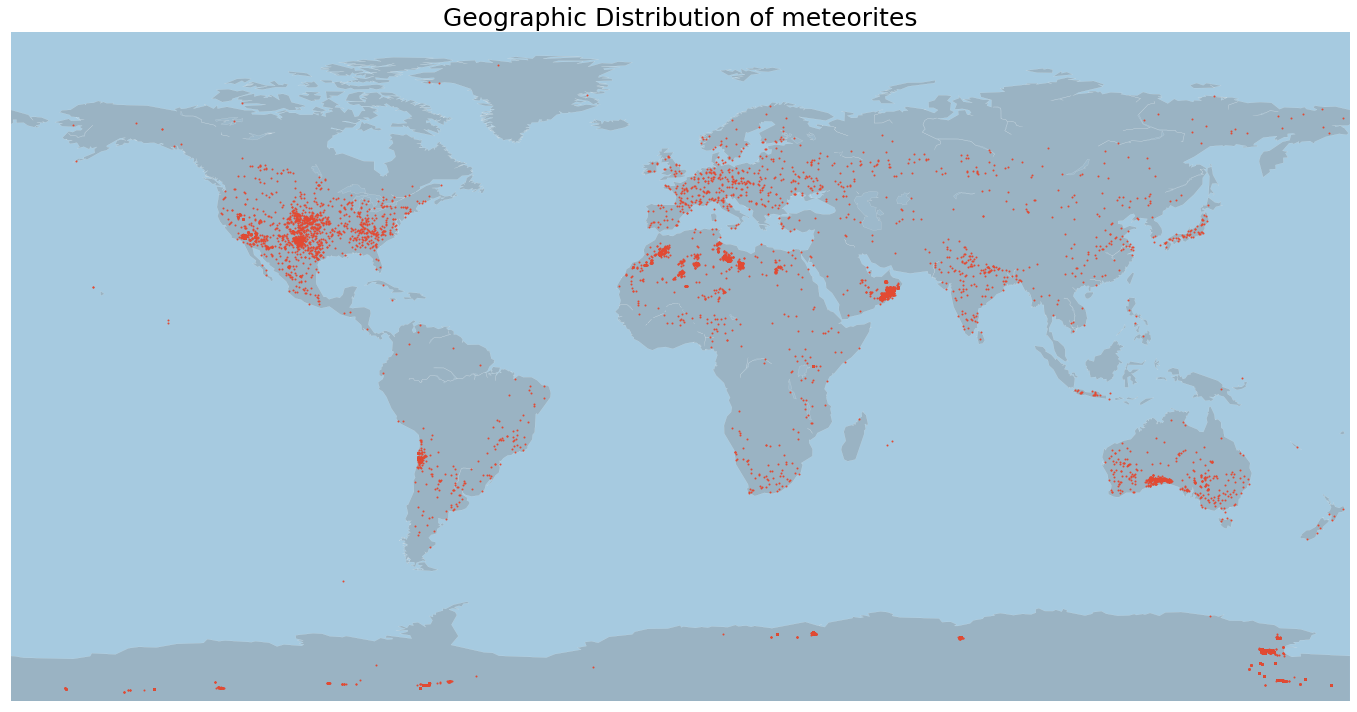

In [115]:
GDM()

#### - Meteorites mapped via geolocation (filtered by mass)

In [117]:


# Make the background map
def MMG():
    plt.figure(figsize=(24,18))
    m=Basemap(llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
    m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
    m.fillcontinents(color='grey', alpha=0.3)
    m.drawcoastlines(linewidth=0.1, color="white")

    maxSize=data['mass (g)'].max()
    m.scatter(data['reclong'], data['reclat'], marker='o', s=data['mass (g)']/maxSize*10000, alpha=0.4)
    plt.title('Bubble map with mass of meteorite encoded in size of bubble', fontsize=25)
    plt.show()

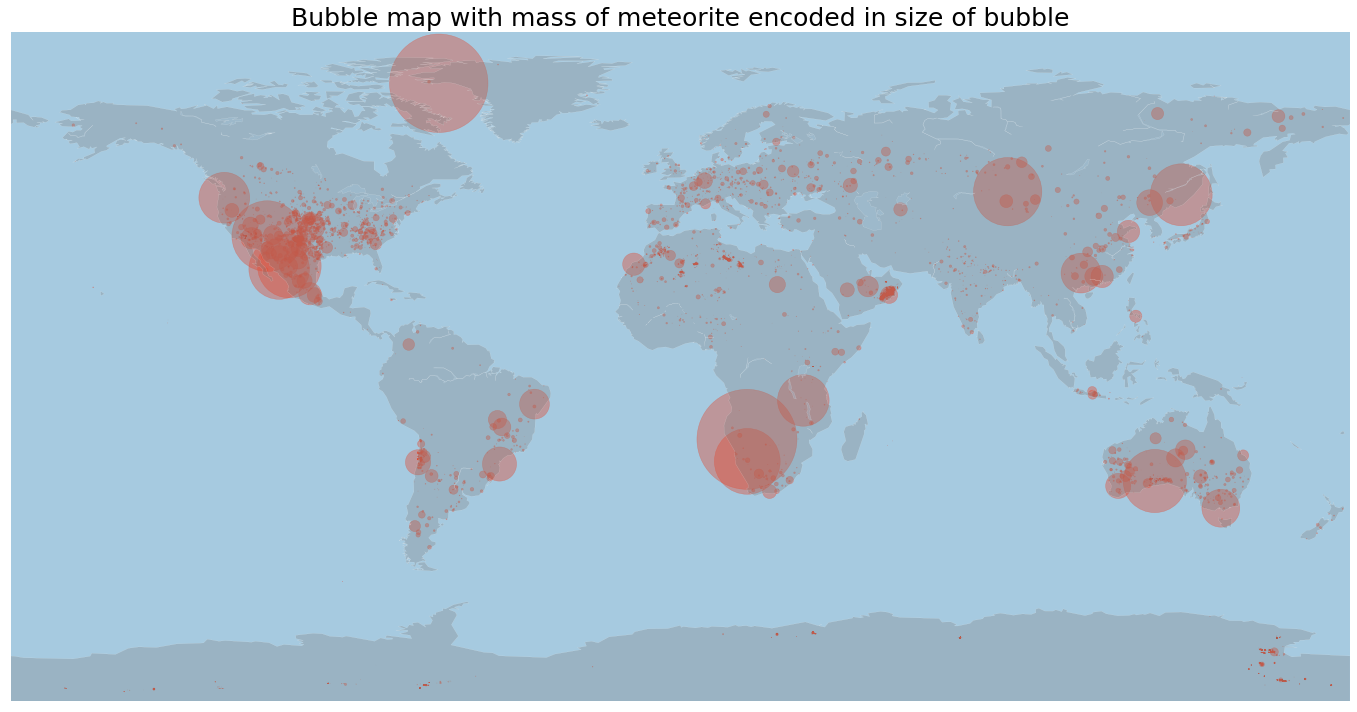

In [118]:
MMG()

#### - Meteorites mapped by location (filtered by fell and found, status and mass) [worldwide]

In [119]:
# Make the background map
def MML():
    plt.figure(figsize=(24,18))
    m=Basemap(llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
    m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
    m.fillcontinents(color='grey', alpha=0.3)
    m.drawcoastlines(linewidth=0.1, color="white")

    maxSize=data['mass (g)'].max()
    m.scatter(fell['reclong'], fell['reclat'], marker='o', s=fell['mass (g)']/maxSize*10000, alpha=0.4, color='red', label='observed')
    m.scatter(found['reclong'], found['reclat'], marker='o', s=found['mass (g)']/maxSize*10000, alpha=0.4, color='black', label='found')
    plt.legend(loc=6, prop={'size': 20}, markerscale=0.5)
    plt.title('Bubble map with mass of meteorite encoded in size of bubble', fontsize=25)
    plt.show()

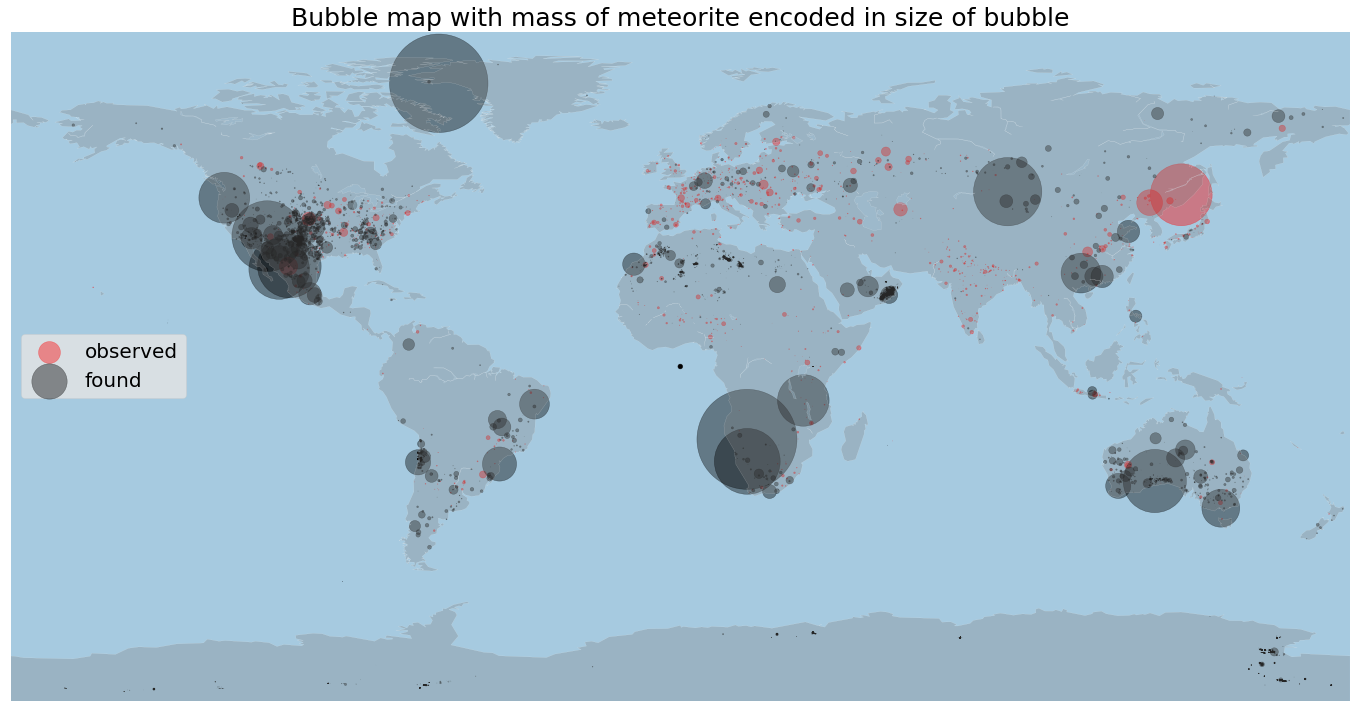

In [120]:
MML()

#### Meteorites mapped by location (interactive/zoomable map)

In [81]:
import folium

In [82]:
usa_map=folium.Map(location=[27,133],zoom_start=2,tiles= 'Stamen Terrain')

for i in range(500):
    lat = data.loc[i,'reclat']
    long = data.loc[i,'reclong']
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>"""
    popup_text = popup_text.format(lat,long)
    color = "#FF4500"
    folium.CircleMarker(location = [lat, long], popup= popup_text, color = color, fill = True).add_to(usa_map)



In [83]:
usa_map

#### Meteorite (known vs unknown composition)

In [84]:
data['nametype'].unique()

array(['Valid', 'Relict'], dtype=object)

In [85]:
#Counting based on types of Meteorites
data['nametype'].value_counts()

Valid     31894
Relict        3
Name: nametype, dtype: int64

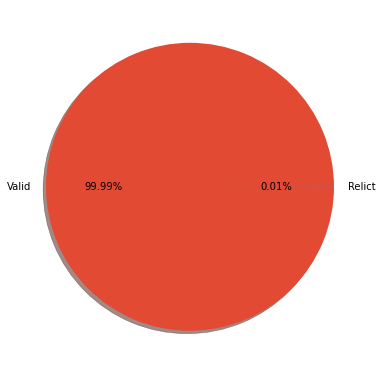

In [86]:


#Plotting Piechart for 'Nametype' Column
fig=plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
ax.pie(data['nametype'].value_counts(),labels=data['nametype'].unique(),autopct='%0.2f%%',shadow=True)
plt.show()



- 99.99% of materials and minerals are known compositions
- 0.01% of minerals are new (introduced by meteor arrival)


Example: Majority of materials from meteorites are composed from nickel, iron, dust and water, while most minerals are comprised of silicates.

A new mineral - donwilhelmsite is the first high-pressure mineral found in meteorites with application for subducted terrestrial sediments. Composed of calcium, aluminum, silicon, and oxygen atoms.

#### Count of Meteorites Year-wise

In [87]:
count_per_year = data['year'].value_counts().reset_index()
count_per_year.sort_values(by =['index'], ascending = True, inplace = True)

In [88]:
count_per_year.reset_index(drop = True, inplace = True)

In [89]:
count_per_year

,index,year
0,1688,1
1,1715,1
2,1716,1
3,1723,1
4,1724,1
...,...,...
233,2009,318
234,2010,418
235,2011,390
236,2012,14


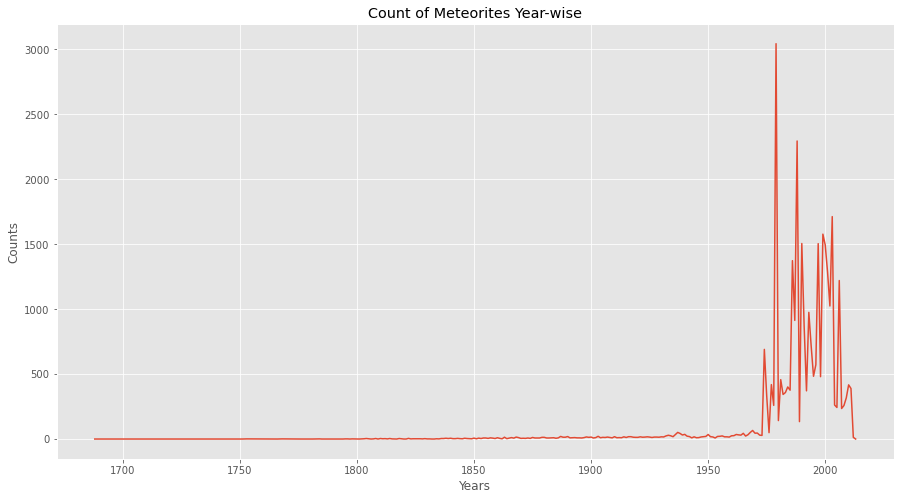

In [90]:
plt.figure(figsize = (15,8))
plt.plot(list(count_per_year['index']),list(count_per_year['year']))
plt.title('Count of Meteorites Year-wise')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.show()

##### Density in each year also depicts the same 

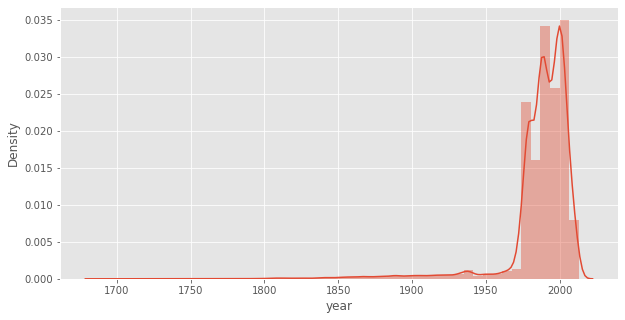

In [91]:
fig = plt.figure(figsize=(10,5))
sns.distplot(data['year'])
plt.show()

#### Mass in Each year 

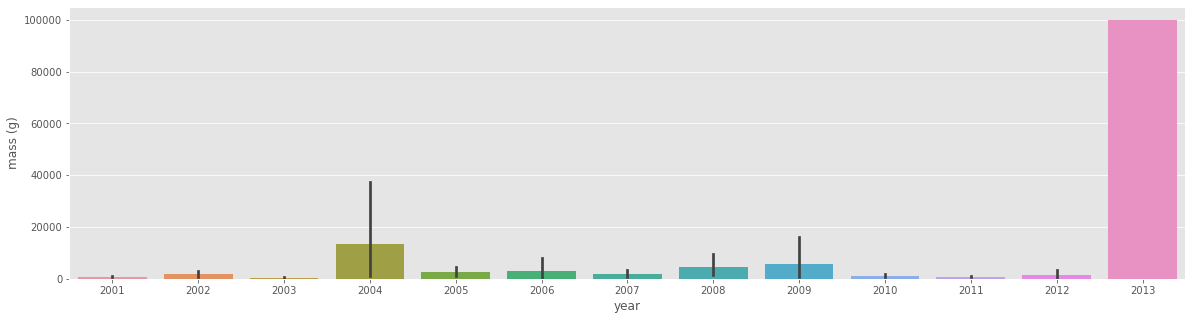

In [92]:
#Relation between Year and Mass in 21st century
twenty = data[data['year']>2000]
fig = plt.figure(figsize=(20,5))
sns.barplot(x= twenty['year'].head(20000),y=twenty['mass (g)'].head(20000))
plt.show()

## Observation Session Data Set

A dataset containing recorded observances of meteorites. 
- Used as supplementary information to gain further insight 

In [93]:
session = pd.read_csv('Session-IMO-VMDB-1997-1-1-2001-1-1.csv', sep = ';')

In [94]:
session

,Session ID,Submitter ID,Actual Observer Name,Start Date,Observer ID,Submitted by,City,Latitude,Longitude,Elevation
1,1999-08-12 22:40:00,579,579,Nada Abanda,Nada Abanda,Al-azraq,NaN,31.750000,37.113889,600.0
7,1997-05-04 22:15:00,584,584,Sana'a Abdo,Sana'a Abdo,Al-azraq,NaN,31.750000,37.113889,600.0
8,1997-05-05 23:30:00,584,584,Sana'a Abdo,Sana'a Abdo,Al-azraq,NaN,31.750000,37.113889,600.0
9,1997-08-10 20:35:00,584,584,Sana'a Abdo,Sana'a Abdo,Al-azraq,NaN,31.750000,37.113889,600.0
10,1997-08-11 20:21:00,584,584,Sana'a Abdo,Sana'a Abdo,Al-azraq,NaN,31.750000,37.113889,600.0
...,...,...,...,...,...,...,...,...,...,...
79763,1999-10-18 23:12:00,82,82,Jurgen Rendtel,Jurgen Rendtel,Potsdam,NaN,52.459371,12.961240,36.0
79764,1999-10-20 01:43:00,82,82,Jurgen Rendtel,Jurgen Rendtel,Potsdam,NaN,52.459371,12.961240,36.0
79765,1999-10-21 01:40:00,82,82,Jurgen Rendtel,Jurgen Rendtel,Potsdam,NaN,52.459371,12.961240,36.0
80066,1999-10-21 05:40:00,7168,7168,Alexandre Amorim,Alexandre Amorim,Florianopolis,NaN,-27.660278,-48.543611,2.0


#### - Number of observers per city

In [95]:
session = session.dropna(subset =['Submitted by'])
observer_per_city = session['Submitted by'].value_counts().reset_index()
observer_per_city.columns = ['City','Observers']
observer_per_city

,City,Observers
0,"Gotenba-si, Sizuoka",892
1,Krakow,410
2,Ostrowik,401
3,Torun (glinki),356
4,Gomel,299
...,...,...
1137,Obs. Hoher List,1
1138,Crevedia Mare,1
1139,"Copons, Anoia",1
1140,"Ingram, Tx",1


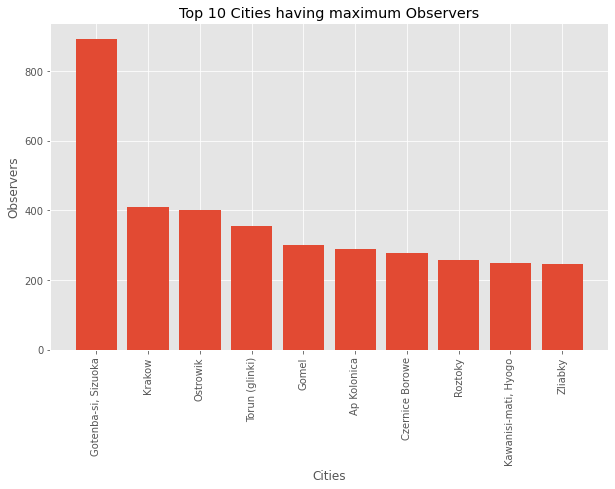

In [96]:
plt.figure(figsize = (10,6))
plt.bar(observer_per_city.City[:10], observer_per_city.Observers[:10])
plt.title('Top 10 Cities with the most Observers')
plt.xlabel('Cities')
plt.ylabel('Observers')
plt.xticks(rotation=90) 
plt.show()

In [121]:
usa_map

#### - Count per Month

In [97]:
session['Session ID'] = pd.to_datetime(session['Session ID'])

In [98]:
session['months'] = session['Session ID'].dt.month

In [99]:
month_count = session.months.value_counts().reset_index()

In [100]:
month_count = month_count.sort_values(by = ['index'], ascending = True)

In [101]:
month_count

,index,months
9,1,770
11,2,540
10,3,592
5,4,999
6,5,923
8,6,838
2,7,1990
0,8,5821
7,9,900
3,10,1446


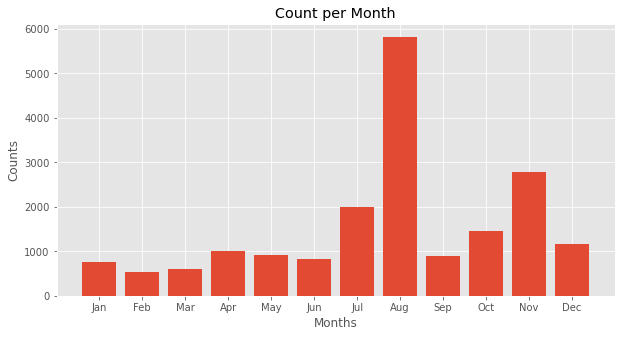

In [102]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize = (10,5))
plt.bar(months,month_count.months )
plt.title('Count per Month')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.show()

### As to why August is the month that people observe meteorites more than any other time periods in the year...

- there is a prolific meteor shower called the Perseids 
- visible from mid-July every year, with peak activity being in August. At it's peak the rate of meteors reachs 60 or more per hour, and is thus a night time spectacle for many people living in regions that can view it clearly.

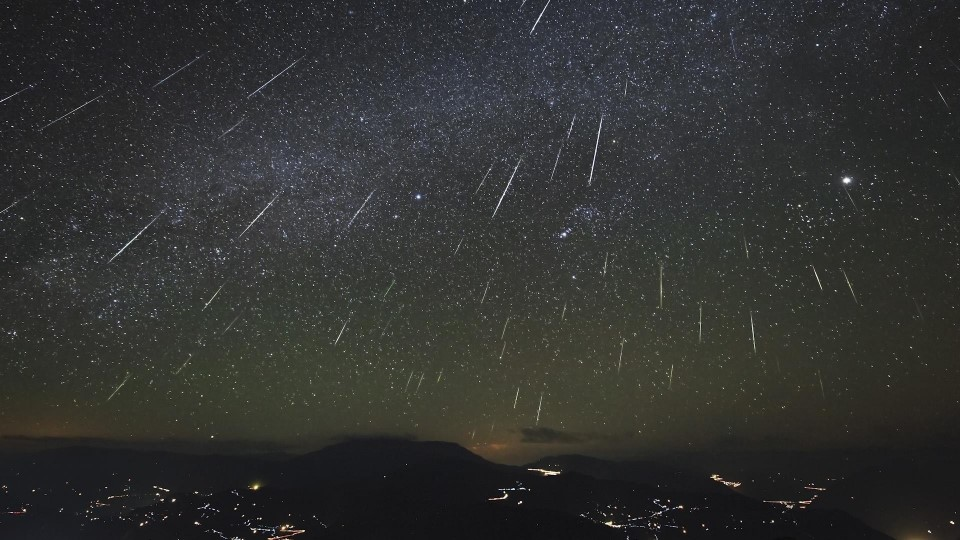

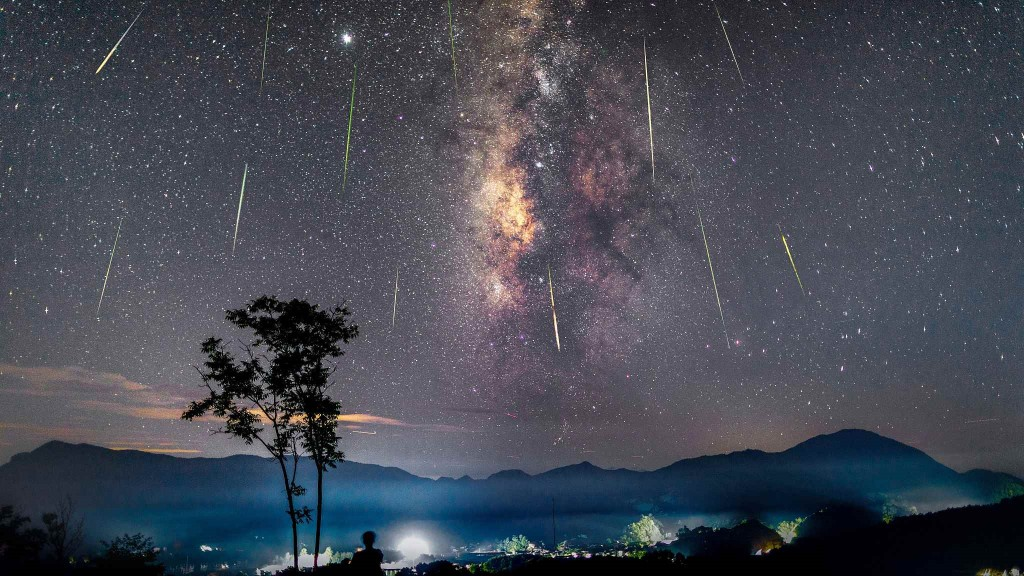

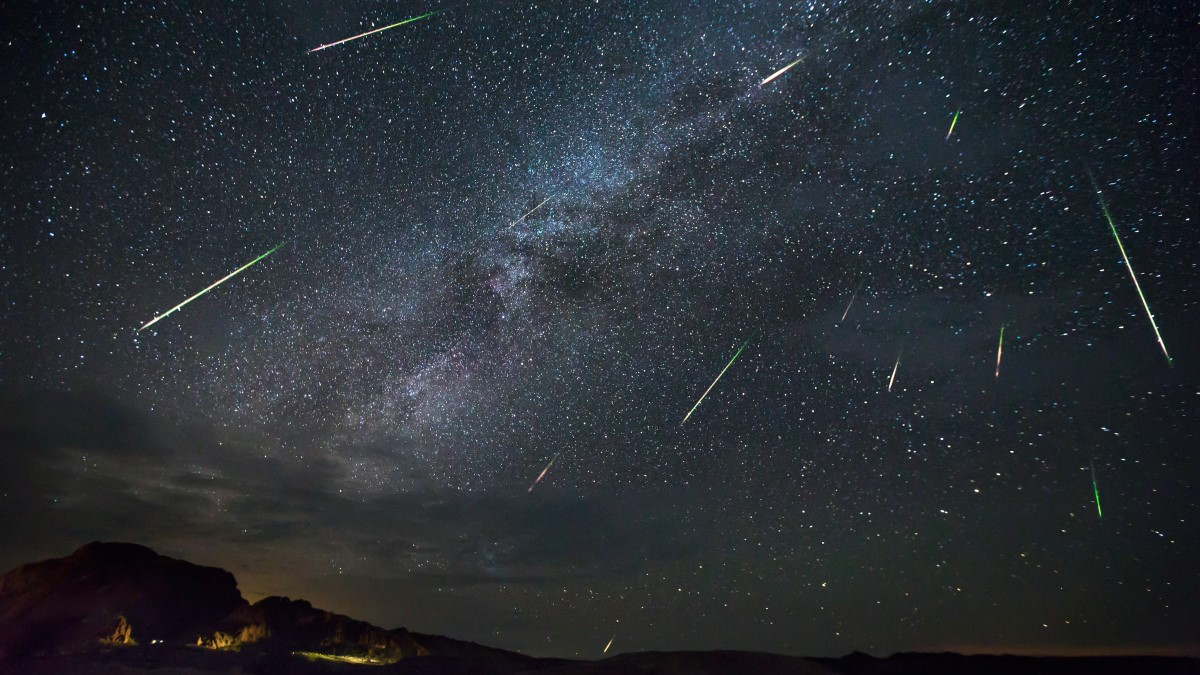

### End of Project

Thank you~